In [1]:
%matplotlib inline

import ROOT
from ROOT import TCanvas, TH1F, TLegend
from NNDefs import build_and_train_class_nn
from LayersDefs import get_signal_and_background_frames, calculate_derived_et_columns, roc_efficiencies, background_eff_at_target_signal_eff
from sklearn.model_selection import train_test_split
import math
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm_notebook as tqdm

Welcome to JupyROOT 6.14/02


In [2]:
#random.seed(7)
#np.random.seed(7)

total_steps = 101

weight_steps = [0.1 * i for i in range(total_steps)]

ninety_percent_efficiencies = np.ones([total_steps])

In [3]:
signal_frame, background_frame = get_signal_and_background_frames()

calculate_derived_et_columns(signal_frame, background_frame)

In [4]:
signal_events = len(signal_frame)

# Find number of signal events that must be cut to fall below 90% efficiency
sig_events_to_cut = math.ceil(signal_events * 0.1)

print(sig_events_to_cut)

408


In [5]:
calculate_derived_et_columns(signal_frame, background_frame, layer_weights=[1, 1], column_names=['L0Et', 'L1Et'],
                                     output_column_name='L0+L1Et')
calculate_derived_et_columns(signal_frame, background_frame, layer_weights=[1, 1], column_names=['L2Et', 'L3Et'],
                                     output_column_name='L2+L3Et')
calculate_derived_et_columns(signal_frame, background_frame, layer_weights=[1, 1, 1], column_names=['L2Et', 'L3Et', 'HadEt'],
                                     output_column_name='L2+L3+HadEt')

In [43]:
# # NOT NECESSARY
# calculate_derived_et_columns(signal_frame, background_frame, layer_weights=[1, -1], column_names=['L0+L1Et', 'L2+L3+HadEt'],
#                                      output_column_name='TotalEt')

# plt.hist(signal_frame['TotalEt'], signal_events)
# plt.hist(background_frame['TotalEt'], len(background_frame))
# plt.show()

In [6]:
for i in tqdm(range(total_steps)):
    l2l3had_weight = weight_steps[i]

    calculate_derived_et_columns(signal_frame, background_frame, layer_weights=[1, l2l3had_weight], column_names=['L0+L1Et', 'L2+L3+HadEt'],
                                     output_column_name='TotalEt')

    end_background_efficiency = background_eff_at_target_signal_eff(signal_frame, background_frame, 'TotalEt', 0.9)
    
    ninety_percent_efficiencies[i] = end_background_efficiency

print(ninety_percent_efficiencies)

100%|██████████| 101/101 [00:02<00:00, 39.92it/s]

[0.73644803 0.50287477 0.39805066 0.3228432  0.27867167 0.26023548
 0.23426842 0.22625961 0.21384814 0.2049559  0.20137873 0.19560023
 0.19057481 0.18672247 0.18362322 0.18268186 0.18188533 0.17923504
 0.17845298 0.17484685 0.17626613 0.17271792 0.17296413 0.17254414
 0.17326826 0.1737317  0.17441237 0.17512201 0.17573028 0.17649785
 0.17685991 0.17677302 0.17768541 0.17878608 0.17936538 0.17979985
 0.18014743 0.18079914 0.1811612  0.18153775 0.18189981 0.18211705
 0.18147982 0.18262393 0.18284117 0.18334806 0.18362322 0.18392736
 0.18434735 0.1845501  0.18489768 0.18501354 0.18527423 0.18541905
 0.18563629 0.18586801 0.18602731 0.18631696 0.18660661 0.18676592
 0.18708453 0.1874466  0.1874466  0.18772176 0.18805486 0.18879347
 0.18927139 0.18979276 0.19034309 0.19048791 0.19028516 0.19005344
 0.18986517 0.18990862 0.19015482 0.19037205 0.19061826 0.19084998
 0.19122652 0.1921534  0.19364509 0.19484714 0.19588988 0.1965271
 0.19684572 0.19723674 0.19696158 0.19671538 0.1965271  0.19633

In [19]:
min_eff = float('inf')
min_i = 0
min_j = 0
for i in range(total_steps):
    for j in range(total_steps):
        if ninety_percent_efficiencies[i] == 0:
            continue
        if ninety_percent_efficiencies[i] < min_eff:
            min_eff = ninety_percent_efficiencies[i]
            min_i = i
            min_j = j
            
print(min_eff)
print(min_i * .1)
print(weight_steps[min_i])
print(ninety_percent_efficiencies[11])

0.17254413532419008
2.3000000000000003
2.3000000000000003
0.19560022592651596


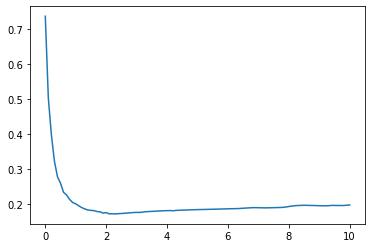

In [8]:
plt.plot(weight_steps, ninety_percent_efficiencies)
plt.show()

In [10]:
print(weight_steps)
print(ninety_percent_efficiencies)

[-3.0, -2.9, -2.8, -2.7, -2.6, -2.5, -2.4, -2.3, -2.2, -2.1, -2.0, -1.9, -1.7999999999999998, -1.7, -1.5999999999999999, -1.5, -1.4, -1.2999999999999998, -1.2, -1.0999999999999999, -1.0, -0.8999999999999999, -0.7999999999999998, -0.6999999999999997, -0.5999999999999996, -0.5, -0.3999999999999999, -0.2999999999999998, -0.19999999999999973, -0.09999999999999964, 0.0, 0.10000000000000009, 0.20000000000000018, 0.30000000000000027, 0.40000000000000036, 0.5, 0.6000000000000001, 0.7000000000000002, 0.8000000000000003, 0.9000000000000004, 1.0, 1.1000000000000005, 1.2000000000000002, 1.2999999999999998, 1.4000000000000004, 1.5, 1.6000000000000005, 1.7000000000000002, 1.8000000000000007, 1.9000000000000004, 2.0, 2.1000000000000005, 2.2, 2.3000000000000007, 2.4000000000000004, 2.5, 2.6000000000000005, 2.7, 2.8000000000000007, 2.9000000000000004, 3.0, 3.1000000000000005, 3.2, 3.3000000000000007, 3.4000000000000004, 3.5, 3.6000000000000005, 3.7, 3.8000000000000007, 3.9000000000000004, 4.0, 4.100000

In [6]:
ninety_percent_efficiencies_2d = np.ones([total_steps, total_steps])

for i in tqdm(range(total_steps)):
    for j in range(total_steps):
        l2l3_weight = weight_steps[i]
        had_weight = weight_steps[j]
        
        calculate_derived_et_columns(signal_frame, background_frame, layer_weights=[1, l2l3_weight, had_weight], 
                                     column_names=['L0+L1Et', 'L2+L3Et', 'HadEt'], output_column_name='TotalEt')

        end_background_efficiency = background_eff_at_target_signal_eff(signal_frame, background_frame, 'TotalEt', 0.9)
    
        ninety_percent_efficiencies_2d[i][j] = end_background_efficiency

print('Done')


Done


In [8]:
print(ninety_percent_efficiencies_2d)

[[0.73644803 0.62407855 0.57175339 ... 0.46123767 0.46123767 0.46123767]
 [0.65214558 0.50287477 0.44955032 ... 0.30954829 0.30954829 0.30954829]
 [0.61475184 0.45311301 0.39805066 ... 0.23897522 0.23897522 0.23897522]
 ...
 [0.67569407 0.66657012 0.63870585 ... 0.1965271  0.19596229 0.19489058]
 [0.67595476 0.66793147 0.63941549 ... 0.19959739 0.19732364 0.19587539]
 [0.67624441 0.66888731 0.64026995 ... 0.20013324 0.19946705 0.19813466]]


In [54]:
x_steps, y_steps = np.meshgrid(weight_steps, weight_steps)

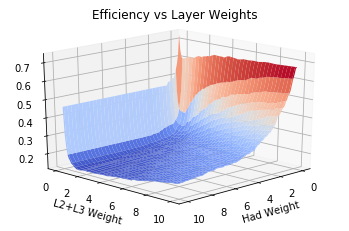

In [64]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(x_steps, y_steps, ninety_percent_efficiencies_2d, cmap=cm.coolwarm)
ax.set_title('Efficiency vs Layer Weights')
ax.set_xlabel('Had Weight')
ax.set_ylabel('L2+L3 Weight')
# ax.set_zlabel('Background Efficiency')
ax.view_init(elev=20, azim=45)

In [7]:
min_eff = float('inf')
min_i = 0
min_j = 0
for i in range(total_steps):
    for j in range(total_steps):
        if ninety_percent_efficiencies_2d[i][j] == 0:
            continue
        if ninety_percent_efficiencies_2d[i][j] < min_eff:
            min_eff = ninety_percent_efficiencies_2d[i][j]
            min_i = i
            min_j = j
            
print(min_eff)
print(min_i)
print(min_j)

0.1278222711407841
13
84


In [7]:
ninetyfive_percent_efficiencies_2d = np.ones([total_steps, total_steps])

for i in tqdm(range(total_steps)):
    for j in range(total_steps):
        l2l3_weight = weight_steps[i]
        had_weight = weight_steps[j]
        
        calculate_derived_et_columns(signal_frame, background_frame, layer_weights=[1, l2l3_weight, had_weight], 
                                     column_names=['L0+L1Et', 'L2+L3Et', 'HadEt'], output_column_name='TotalEt')

        end_background_efficiency = background_eff_at_target_signal_eff(signal_frame, background_frame, 'TotalEt', 0.95)
    
        ninetyfive_percent_efficiencies_2d[i][j] = end_background_efficiency

print('Done')

KeyboardInterrupt: 

In [63]:
min_eff = float('inf')
min_i = 0
min_j = 0
for i in range(total_steps):
    for j in range(total_steps):
        if ninetyfive_percent_efficiencies_2d[i][j] == 0:
            continue
        if ninetyfive_percent_efficiencies_2d[i][j] < min_eff:
            min_eff = ninetyfive_percent_efficiencies_2d[i][j]
            min_i = i
            min_j = j
            
print(min_eff)
print(min_i)
print(min_j)

0.6006024707092065
3
36


[0.61982071 0.50952222 0.4222219  0.36839056 0.30896899 0.27193732
 0.25927964 0.23612217 0.21578879 0.21326884 0.20385523 0.20045185
 0.19290649 0.18672247 0.18365219 0.18142189 0.18132051 0.17451375
 0.17016901 0.17106692 0.1655491  0.16580979 0.16147953 0.16242089
 0.15978508 0.16062506 0.15703341 0.15743892 0.15793132 0.15855407
 0.15884372 0.15849614 0.15824994 0.15639618 0.15558516 0.15373141
 0.15338383 0.15145766 0.15171834 0.14867703 0.14476676 0.1448971
 0.14360816 0.14378195 0.14278266 0.14263784 0.1401903  0.139611
 0.13882895 0.13752553 0.13758346 0.13694623 0.13648279 0.13648279
 0.13652623 0.13659865 0.13665658 0.13671451 0.136309   0.13636693
 0.13645382 0.13649727 0.13652623 0.13654072 0.13656968 0.13662761
 0.13620762 0.13542557 0.13332561 0.13332561 0.12974844 0.1293719
 0.12898087 0.12899535 0.12900983 0.12902432 0.12902432 0.12902432
 0.12902432 0.12902432 0.12902432 0.12902432 0.12902432 0.12853191
 0.12782227 0.12782227 0.12782227 0.12782227 0.12782227 0.12782227

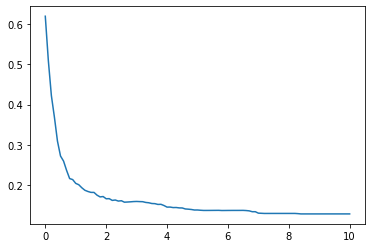

In [31]:
print(ninety_percent_efficiencies_2d[13])

plt.plot(weight_steps, ninety_percent_efficiencies_2d[13])
#plt.xlim((8,9))
#plt.ylim((0.127,0.13))
plt.show()

In [34]:
# for i in range(len(weight_steps)):
#     print(weight_steps[i])
#     print(ninety_percent_efficiencies_2d[13][i])

In [7]:
total_steps = 101

weight_steps = [0.1 * i for i in range(total_steps)]

min_eff = float('inf')
min_i = 0
min_j = 0
min_k = 0
min_l = 0

for l1weight in tqdm(range(total_steps)):
    for j in range(total_steps):
        for k in range(total_steps):
            for l in range(total_steps):
                l0_weight = weight_steps[i]
                l2_weight = weight_steps[j]
                l3_weight = weight_steps[k]
                had_weight = weight_steps[l]
        
                calculate_derived_et_columns(signal_frame, background_frame, layer_weights=[l0_weight, 1, l2_weight, l3_weight, had_weight], 
                                     column_names=['L0Et', 'L1Et', 'L2Et', 'L3Et', 'HadEt'], output_column_name='TotalEt')

                end_background_efficiency = background_eff_at_target_signal_eff(signal_frame, background_frame, 'TotalEt', 0.9)
    
                if end_background_efficiency == 0:
                    continue
                if end_background_efficiency < min_eff:
                    min_eff = end_background_efficiency
                    min_i = i
                    min_j = j
                    min_k = k
                    min_l = l

print(end_background_efficiency)
print(min_i)
print(min_j)
print(min_k)
print(min_l)

L1Weight0



NameError: name 'i' is not defined

In [ ]:
total_steps = 41

weight_steps = [0.2 * i for i in range(total_steps)]

min_eff = float('inf')
min_i = 0
min_j = 0
min_k = 0
min_l = 0

for i in tqdm(range(total_steps)):
    file_name = f'4DManualWeights/L1Weight{i}'
    with open(file_name, 'a+') as f:
        f.seek(0)
        lines = f.readlines()
        num_of_lines = len(lines)
    if num_of_lines < total_steps ** 3:
        with open(file_name, 'w') as f:
            for j in range(total_steps):
                for k in range(total_steps):
                    for l in range(total_steps):
                        l0_weight = weight_steps[i]
                        l2_weight = weight_steps[j]
                        l3_weight = weight_steps[k]
                        had_weight = weight_steps[l]

                        calculate_derived_et_columns(signal_frame, background_frame, layer_weights=[l0_weight, 1, l2_weight, l3_weight, had_weight], 
                                     column_names=['L0Et', 'L1Et', 'L2Et', 'L3Et', 'HadEt'], output_column_name='TotalEt')

                        end_background_efficiency = background_eff_at_target_signal_eff(signal_frame, background_frame, 'TotalEt', 0.9)

                        loop_identifier = 'i={} j={} k={} l={}'.format(i, j, k, l)
                        f.write('{} - {}\n'.format(end_background_efficiency, loop_identifier))
    else:
        print(f'Skipping i = {i}')
        continue

Skipping i = 0
Skipping i = 1
Skipping i = 2
Skipping i = 3
Skipping i = 4
Skipping i = 5
Skipping i = 6
Skipping i = 7
Skipping i = 8


In [ ]:
min_eff = float('inf')
min_i = 0
min_j = 0
min_k = 0
min_l = 0
for i in range(total_steps):
    for j in range(total_steps):
        for k in range(total_steps):
            for l in range(total_steps):
                if ninety_percent_efficiencies_4d[i][j][k][l] == 0:
                    continue
                if ninety_percent_efficiencies_4d[i][j][k][l] < min_eff:
                    min_eff = ninety_percent_efficiencies_4d[i][j][k][l]
                    min_i = i
                    min_j = j
                    min_k = k
                    min_l = l
            
print(min_eff)
print(min_i)
print(min_j)
print(min_k)
print(min_l)